In [1]:
import pandas as pd
from pandas import Series,DataFrame


In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

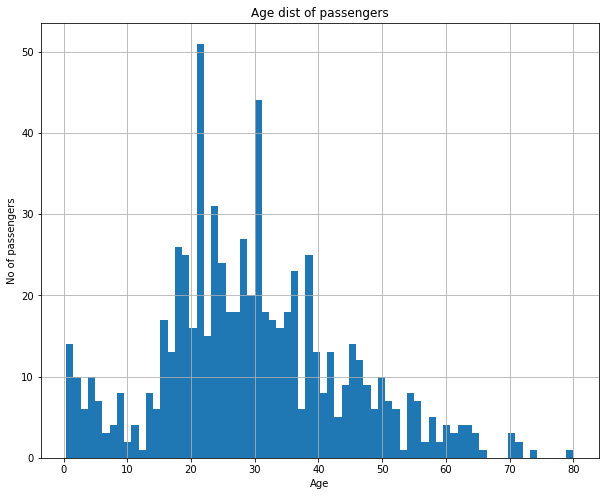

In [10]:
plt.figure(figsize=(10,8))
train_df['Age'].hist(bins=70)
plt.title('Age dist of passengers')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.show()

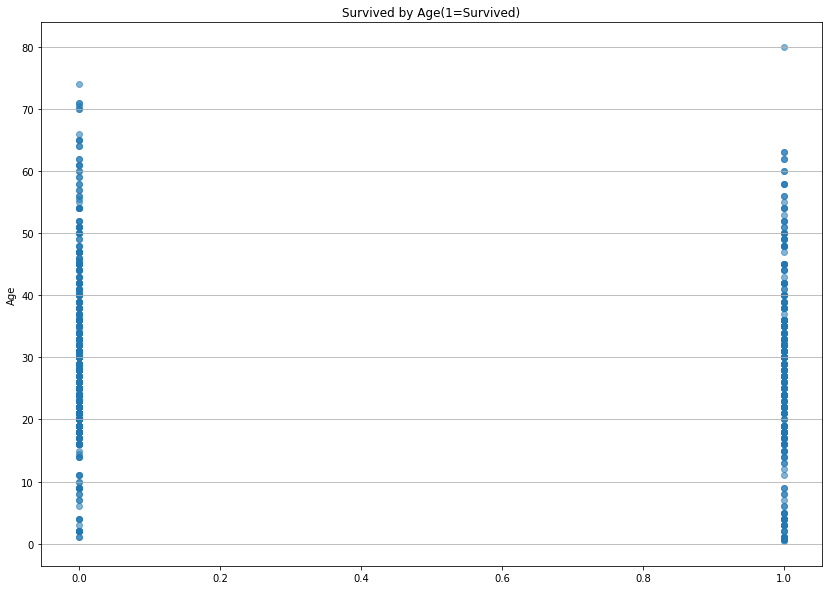

In [13]:
# Exploer tha data for passenger Survived by Age
plt.figure(figsize=(14,10))
plt.scatter(train_df.Survived,train_df.Age,alpha=.55)
plt.ylabel('Age')
plt.grid(b=True,which='major',axis='y')
plt.title('Survived by Age(1=Survived)')
plt.show()          


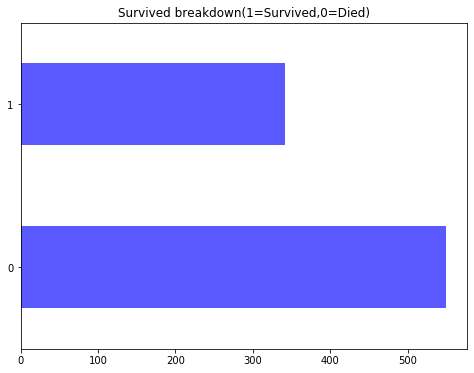

In [14]:
plt.figure(figsize=(8,6))
train_df.Survived.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title('Survived breakdown(1=Survived,0=Died)')
plt.show()

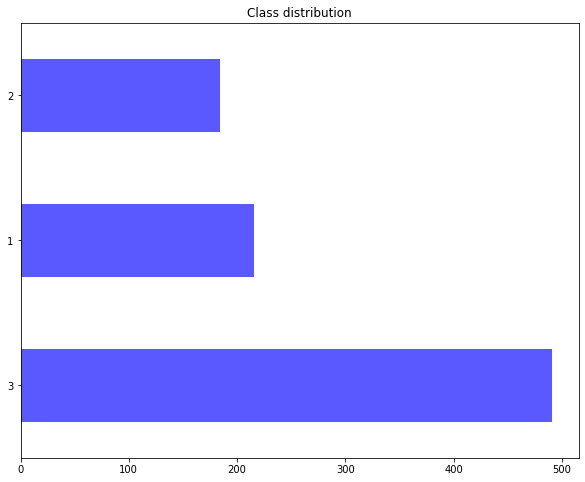

In [15]:
#Explore the data passenger class distribution
plt.figure(figsize=(10,8))
train_df.Pclass.value_counts().plot(kind='barh',color='blue',alpha=.65)
plt.title('Class distribution')
plt.show()

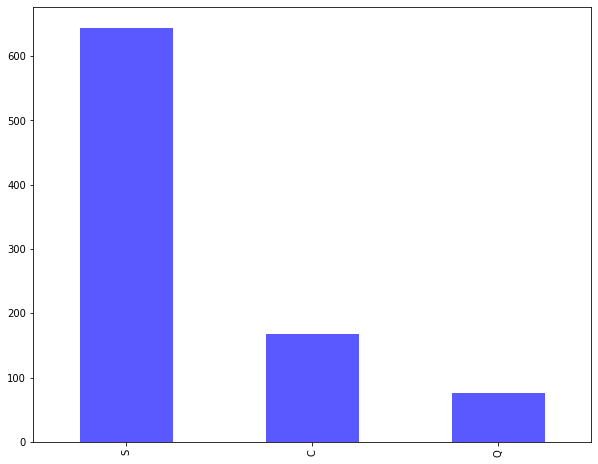

In [16]:
# Explore data for passenger Embarked by Location
plt.figure(figsize=(10,8))
train_df.Embarked.value_counts().plot(kind='bar',color='blue',alpha=.65)


# Machine Learning 

In [56]:
def load_titanic_train_file():
    titanic_train_df = pd.read_csv('train.csv')
    cols =['Pclass','Sex','Age']
    titanic_train_df['Sex']= titanic_train_df['Sex'].apply(lambda sex:1 if sex==1 else 0)
    
    titanic_train_df['Age']=titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean())
    titanic_train_df['Fare']=titanic_train_df['Fare'].fillna(titanic_train_df['Fare'].mean())
    Survived = titanic_train_df['Survived'].values
    data = titanic_train_df[cols].values
    return Survived,data
    
    




In [57]:

def load_titanic_test_file():
    titanic_test_df = pd.read_csv('test.csv')
    cols =['Pclass','Sex','Age']
    titanic_test_df['Sex']= titanic_test_df['Sex'].apply(lambda sex:1 if sex==1 else 0)
    
    titanic_test_df['Age']=titanic_test_df['Age'].fillna(titanic_test_df['Age'].mean())
    titanic_test_df['Fare']=titanic_test_df['Fare'].fillna(titanic_test_df['Fare'].mean())
    
    data = titanic_test_df[cols].values
    
    
    return data
    


In [58]:
# Now creat datSET FOR machine learning

Survived,data_train = load_titanic_train_file()
data_test = load_titanic_test_file()

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data_train,Survived)


C:\Users\a1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
predict = model.predict(data_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [63]:
# create data for prediction and testing
new_data_prediction_set = [[1,1,22],[3,0,26],[1,0,38]]

In [65]:
model.predict(new_data_prediction_set)

array([1, 0, 1], dtype=int64)